In [6]:
import os
os.chdir('/opt/project')
print(os.getcwd())

/opt/project


In [ ]:
from dcmrtstruct2nii import dcmrtstruct2nii
from dcmrtstruct2nii.exceptions import InvalidFileFormatException
from tqdm import tqdm


def convert_wiki2nii(csv_path, data_path, output_path, modality="MR"):
    csv = pd.read_csv(csv_path)

    pt_ids = np.unique(csv["Subject ID"])

    for pt_id in tqdm(pt_ids):
        pt_rows = csv.loc[csv["Subject ID"] == pt_id]
        struct_file = pt_rows.loc[pt_rows["Modality"] == "RTSTRUCT"]["File Location"].iloc[0]
        struct_file = os.path.join(data_path, struct_file)
        struct_file = os.path.join(struct_file, os.listdir(struct_file)[0])

        image_file = pt_rows.loc[pt_rows["Modality"] == modality]["File Location"].iloc[0]
        image_file = os.path.join(data_path, image_file)

        pt_path = os.path.join(output_path, pt_id)
        if not os.path.exists(pt_path):
            os.mkdir(pt_path)
        try:
            dcmrtstruct2nii(struct_file, image_file, pt_path)
        except InvalidFileFormatException as e:
            print(e)
            os.rmdir(pt_path)
            pass

convert_wiki2nii("example_data/manifest-MjbMt99Q1553106146386120388/t2stirmetadata.csv",
                 "./example_data/manifest-MjbMt99Q1553106146386120388/",
                 "./data/")

In [8]:
from autorad.utils.preprocessing import get_paths_with_separate_folder_per_case
root_dir = './data/wiki_sarcoma'

paths_df = get_paths_with_separate_folder_per_case(root_dir, relative=True, image_stem='image', mask_stem='mask_GTV_Mass')

paths_df

,ID,image_path,segmentation_path
0,STS_001,STS_001/image.nii.gz,STS_001/mask_GTV_Mass.nii.gz
1,STS_002,STS_002/image.nii.gz,STS_002/mask_GTV_Mass.nii.gz
2,STS_003,STS_003/image.nii.gz,STS_003/mask_GTV_Mass.nii.gz
3,STS_004,STS_004/image.nii.gz,STS_004/mask_GTV_Mass.nii.gz
4,STS_005,STS_005/image.nii.gz,STS_005/mask_GTV_Mass.nii.gz
5,STS_006,STS_006/image.nii.gz,STS_006/mask_GTV_Mass.nii.gz
6,STS_007,STS_007/image.nii.gz,STS_007/mask_GTV_Mass.nii.gz
7,STS_008,STS_008/image.nii.gz,STS_008/mask_GTV_Mass.nii.gz
8,STS_009,STS_009/image.nii.gz,STS_009/mask_GTV_Mass.nii.gz
9,STS_010,STS_010/image.nii.gz,STS_010/mask_GTV_Mass.nii.gz


[07/31/23 09:15:29] INFO     Cropping the image of size (256, 256, 44) to the region from       ]8;id=103941;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py\plot_volumes.py]8;;\:]8;id=958892;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py#118\118]8;;\
                             [164, 58, 0] to [252, 130, 44]                                                        

                    INFO     Cropping the image of size (256, 256, 44) to the region from       ]8;id=940830;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py\plot_volumes.py]8;;\:]8;id=321162;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py#118\118]8;;\
                             [164, 58, 0] to [252, 130, 44]                                                        

                    INFO     Cropping the image of size (256, 256, 44) to the region from       ]8;id=899051;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py\plot_volumes.py]8;;\:]8;id=174134;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py#118\118]8;;\
                             [164, 58, 0] to [252, 130, 44]                                                        

[07/31/23 09:15:30] INFO     Cropping the image of size (512, 512, 50) to the region from       ]8;id=455857;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py\plot_volumes.py]8;;\:]8;id=838412;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py#118\118]8;;\
                             [103, 174, 5] to [213, 277, 50]                                                       

                    INFO     Cropping the image of size (512, 512, 50) to the region from       ]8;id=557021;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py\plot_volumes.py]8;;\:]8;id=618097;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py#118\118]8;;\
                             [103, 174, 5] to [213, 277, 50]                                                       

                    INFO     Cropping the image of size (512, 512, 50) to the region from       ]8;id=404579;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py\plot_volumes.py]8;;\:]8;id=2486;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py#118\118]8;;\
                             [103, 174, 5] to [213, 277, 50]                                                       

[07/31/23 09:15:31] INFO     Cropping the image of size (512, 512, 63) to the region from       ]8;id=429520;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py\plot_volumes.py]8;;\:]8;id=882634;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py#118\118]8;;\
                             [77, 76, 0] to [278, 343, 53]                                                         

                    INFO     Cropping the image of size (512, 512, 63) to the region from       ]8;id=860105;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py\plot_volumes.py]8;;\:]8;id=811784;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py#118\118]8;;\
                             [77, 76, 0] to [278, 343, 53]                                                         

                    INFO     Cropping the image of size (512, 512, 63) to the region from       ]8;id=826961;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py\plot_volumes.py]8;;\:]8;id=647246;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py#118\118]8;;\
                             [77, 76, 0] to [278, 343, 53]                                                         

                    INFO     Cropping the image of size (256, 256, 48) to the region from       ]8;id=334587;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py\plot_volumes.py]8;;\:]8;id=448361;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py#118\118]8;;\
                             [50, 128, 0] to [196, 248, 48]                                                        

                    INFO     Cropping the image of size (256, 256, 48) to the region from       ]8;id=401537;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py\plot_volumes.py]8;;\:]8;id=648631;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py#118\118]8;;\
                             [50, 128, 0] to [196, 248, 48]                                                        

                    INFO     Cropping the image of size (256, 256, 48) to the region from       ]8;id=879427;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py\plot_volumes.py]8;;\:]8;id=626019;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py#118\118]8;;\
                             [50, 128, 0] to [196, 248, 48]                                                        

                    INFO     Cropping the image of size (256, 256, 45) to the region from       ]8;id=50463;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py\plot_volumes.py]8;;\:]8;id=42514;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py#118\118]8;;\
                             [50, 41, 0] to [219, 196, 45]                                                         

                    INFO     Cropping the image of size (256, 256, 45) to the region from       ]8;id=252142;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py\plot_volumes.py]8;;\:]8;id=479357;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py#118\118]8;;\
                             [50, 41, 0] to [219, 196, 45]                                                         

                    INFO     Cropping the image of size (256, 256, 45) to the region from       ]8;id=267594;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py\plot_volumes.py]8;;\:]8;id=814836;file:///usr/local/lib/python3.10/site-packages/autorad/visualization/plot_volumes.py#118\118]8;;\
                             [50, 41, 0] to [219, 196, 45]                                                         

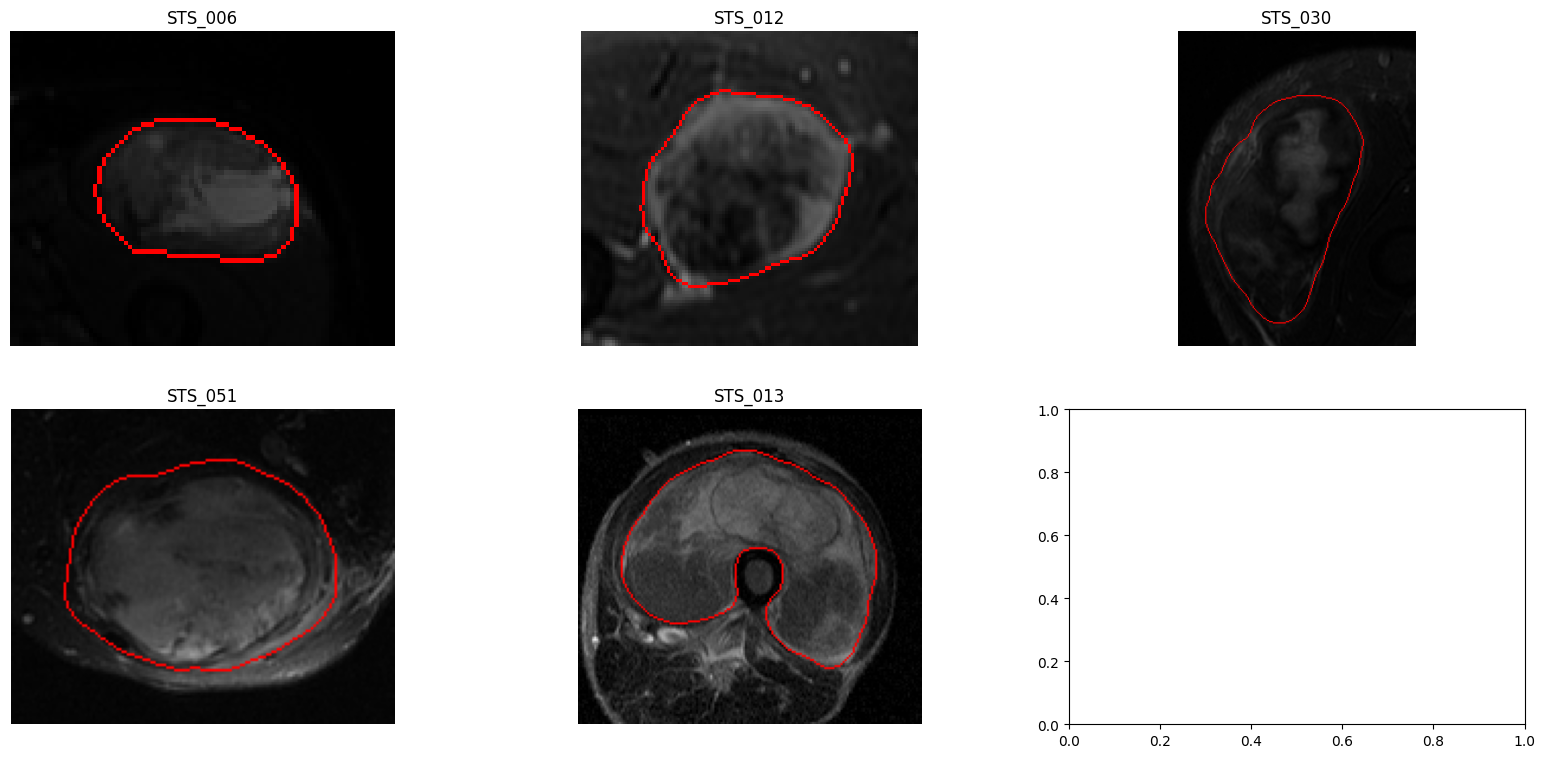

In [9]:
from src.dataset import ImageDataset

image_dataset = ImageDataset(
    paths_df,
    ID_colname='ID',
    root_dir=root_dir
)

image_dataset.plot_examples(n=5, window=None, label=255)

In [11]:

from autorad.feature_extraction import FeatureExtractor

extractor = FeatureExtractor(image_dataset, extraction_params='./conf/radiomic_params/mr_default.yaml', n_jobs=-1)

feature_df = extractor.run()

[07/31/23 09:17:44] INFO     Using extraction params from conf/radiomic_params/mr_default.yaml      ]8;id=88198;file:///usr/local/lib/python3.10/site-packages/autorad/feature_extraction/extractor.py\extractor.py]8;;\:]8;id=69924;file:///usr/local/lib/python3.10/site-packages/autorad/feature_extraction/extractor.py#46\46]8;;\

                    INFO     validation.valid                                                           ]8;id=878973;file:///usr/local/lib/python3.10/site-packages/pykwalify/core.py\core.py]8;;\:]8;id=998168;file:///usr/local/lib/python3.10/site-packages/pykwalify/core.py#188\188]8;;\

                    INFO     Initialized extractor pyradiomics                                     ]8;id=607098;file:///usr/local/lib/python3.10/site-packages/autorad/feature_extraction/extractor.py\extractor.py]8;;\:]8;id=359135;file:///usr/local/lib/python3.10/site-packages/autorad/feature_extraction/extractor.py#129\129]8;;\

                    INFO     Extracting features                                                    ]8;id=578145;file:///usr/local/lib/python3.10/site-packages/autorad/feature_extraction/extractor.py\extractor.py]8;;\:]8;id=418249;file:///usr/local/lib/python3.10/site-packages/autorad/feature_extraction/extractor.py#76\76]8;;\

QUEUEING TASKS | : 0it [00:00, ?it/s]

PROCESSING TASKS | :   0%|          | 0/51 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/51 [00:00<?, ?it/s]

[07/31/23 09:18:09] INFO     get_features_parallel took 25.33095908164978sec                            ]8;id=328639;file:///usr/local/lib/python3.10/site-packages/autorad/utils/utils.py\utils.py]8;;\:]8;id=680270;file:///usr/local/lib/python3.10/site-packages/autorad/utils/utils.py#18\18]8;;\

In [ ]:
import pandas as pd
label_df = pd.read_csv('./data/wiki_sarcoma_meta.csv', encoding='cp1252')
label_df.sample(5)

In [ ]:
from autorad.data import FeatureDataset
import numpy as np

merged_feature_df = feature_df.merge(label_df,
                                     left_on="ID", right_on="Patient ID", how="left")
merged_feature_df = merged_feature_df[merged_feature_df['Grade'].notna()]

merged_feature_df['Grade'] = merged_feature_df['Grade'].map({v:k for k, v in enumerate(merged_feature_df['Grade'].unique())})

feature_dataset = FeatureDataset(merged_feature_df,
                                 target="Grade",
                                 ID_colname="ID")

In [ ]:
feature_dataset.split(method='train_val_test', save_path='outputs/splits.yml')

In [ ]:
feature_dataset.split(method='train_val_test', save_path='outputs/splits.yml')
from autorad.models import MLClassifier

models = MLClassifier.initialize_default_sklearn_models()